# GRIP Task - 2
### A Simple Linear Regression task to predict the percentage of marks that a student is expected to score based on the number of hours they studied
_________________________

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read and Display the data

In [2]:
data=pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Checking for null values

In [3]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Scatter plot - Study hours vs. Scores attained

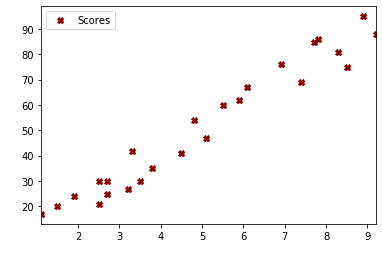

In [4]:
data.plot(x='Hours',y='Scores',style='X', c='darkred')
plt.xlabel('Study hours',c='white')
plt.ylabel('Scores attained',c='white')
plt.show()

### Heat map Visualization

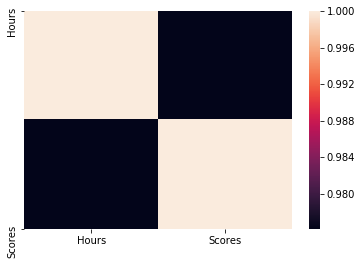

In [5]:
corr=data.corr()
sns.heatmap(corr)

### Paiplot Visualization

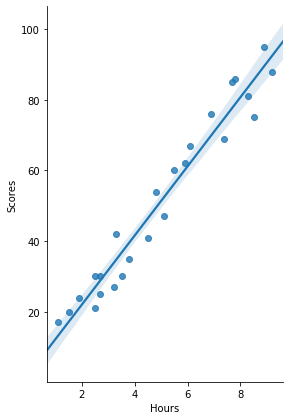

In [6]:
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],height=6,aspect=0.7,kind='reg',markers='o')

### From the above visualizations it's clear that there's strong relation between number of hours studied and Percentage of scores

### Preparing the data

In [7]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [8]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Split the data for test and train

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Training the algorithm - Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Plotting the regression line

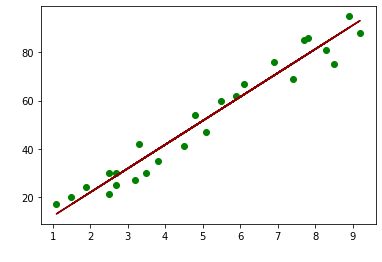

In [12]:
line = lreg.coef_ * x + lreg.intercept_
plt.scatter(x, y,c='green')
plt.plot(x,line, c='darkred')
plt.xlabel('Study hours',c='white')
plt.ylabel('Scores attained',c='white')
plt.show()

## Predictions

In [13]:
y_pred=lreg.predict(x_test)
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [14]:
df = pd.DataFrame({'Original': y_test, 'Predicted': y_pred, 'Deviation': abs(y_test - y_pred)}) 
df

,Original,Predicted,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


### Evaluating model accuracy : Mean Absolute Error

In [15]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

4.183859899002982

### Answer to the problem statement - Prediction when number of study hours = 9.25

In [16]:
hours = 9.25
own_pred = lreg.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Score attained would be = {}".format(own_pred[0]))

Number of hours = 9.25
Score attained would be = 93.69173248737539


### Evaluating model accuracy:Mean Absolute Error

In [17]:
metrics.mean_absolute_error(y_test,y_pred)

4.183859899002982